Name: Dhairya Chhabra

Task : predicting percentage of students based on number of hours studied using Supervised Learning

Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data

In [2]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Scatter Plot of Given data hours vs percentage score

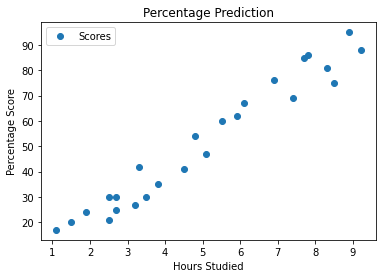

In [3]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Percentage Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
X=data.iloc[:,[0]]
Y=data.iloc[:, [1]]
X.shape , Y.shape

((25, 1), (25, 1))

Spliting Training and Testing data from given data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid = train_test_split(X,Y,random_state=2,test_size=0.2)
X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

((20, 1), (5, 1), (20, 1), (5, 1))

Importing linear regression and training model

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [8]:
pred=model.predict(X_valid)
pred

array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [9]:
Y_valid

,Scores
14,17
0,21
17,24
6,88
23,76


Difference Between predicted values and actual values of testing data

In [10]:
differ=Y_valid - pred

In [11]:
pd.DataFrame(np.c_[Y_valid,pred,differ] ,columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,17.0,12.442587,4.557413
1,21.0,26.359448,-5.359448
2,24.0,20.395079,3.604921
3,88.0,92.961570,-4.961570
4,76.0,70.098155,5.901845


THIS IS PLOT OF TRAINING DATASET: BLUE DOTS SHOWS ACTUAL VALUES AND RED LINE SHOWS PREDICTED VALUES BY MODEL

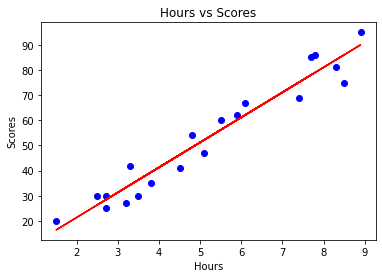

In [12]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train,model.predict(X_train),color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

THIS IS PLOT OF TESTING DATASET: BLUE DOTS SHOWS ACTUAL VALUES AND RED LINE SHOWS PREDICTED VALUES BY MODEL

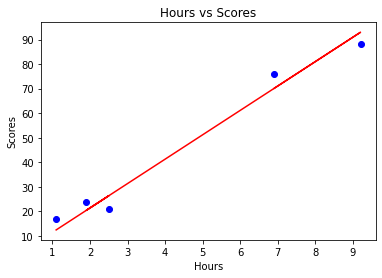

In [13]:
plt.scatter(X_valid, Y_valid, color='blue')
plt.plot(X_valid,model.predict(X_valid),color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Checking the Accuracy of the model

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
model.score(X_valid,Y_valid)

0.9735538080811826

In [16]:
r2_score(Y_valid,pred)

0.9735538080811826

In [17]:
rmse=np.sqrt(mean_squared_error(Y_valid,pred))
rmse

4.938382360637607

Predicting Score after studying 9.25 hours

In [18]:
hr=9.25
model.predict([[hr]])[0]
print(f'Score in studying {hr} hours is {int(model.predict([[hr]])[0])}%')

Score in studying 9.25 hours is 93%
